# Set-up

In [118]:
# --- Standard library ---
import pickle

# --- Scientific computing ---
import numpy as np

# --- Network science ---

# --- Data handling and visualization ---
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

FIGROOT = "../../results/plots/"


# --- Project source code ---

In [119]:
metadata = {
    "PROJECT_ID": "EMB_ex32",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v2.1",
    "DATE": "20230417"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

In [120]:
df = df.replace({
    "{'imb'}": "Intercept",
    "{'emb'}": "Embedding",
    "{'deg'}": "Degree",
    "{'imb', 'emb'}": "Intercept + Embedding",
    "{'emb', 'imb'}": "Intercept + Embedding",
    "{'imb', 'deg'}": "Intercept + Degree",
    "{'deg', 'imb'}": "Intercept + Degree",
    "{'emb', 'deg'}": "Embedding + Degree",
    "{'deg', 'emb'}": "Embedding + Degree",
    "{'imb', 'emb', 'deg'}": "Intercept + Embedding + Degree",
    "{'imb', 'deg', 'emb'}": "Intercept + Embedding + Degree",
    "{'emb', 'deg', 'imb'}": "Intercept + Embedding + Degree",
    "{'emb', 'imb', 'deg'}": "Intercept + Embedding + Degree",
    "{'deg', 'imb', 'emb'}": "Intercept + Embedding + Degree",
    "{'deg', 'emb', 'imb'}": "Intercept + Embedding + Degree",
})

In [121]:
df["mu"] = df.system.apply(lambda x: float(x.split("_")[1].split("-")[1]))
df["prob"] = df.system.apply(lambda x: float(x.split("_")[2].split("-")[1]))

In [122]:
df = df.drop(columns=["Unnamed: 0", "system", "l1", "l2", "log_penalty"])

# Performance analysis

## Trade-off measures

In [123]:
BOX = [(0,0),(1,1)]  # lower left, upper right

_features = ["Intercept + Embedding", "Intercept + Degree", "Intercept + Embedding + Degree"]
df_ = df.query("features in @_features")

<Figure size 640x480 with 0 Axes>

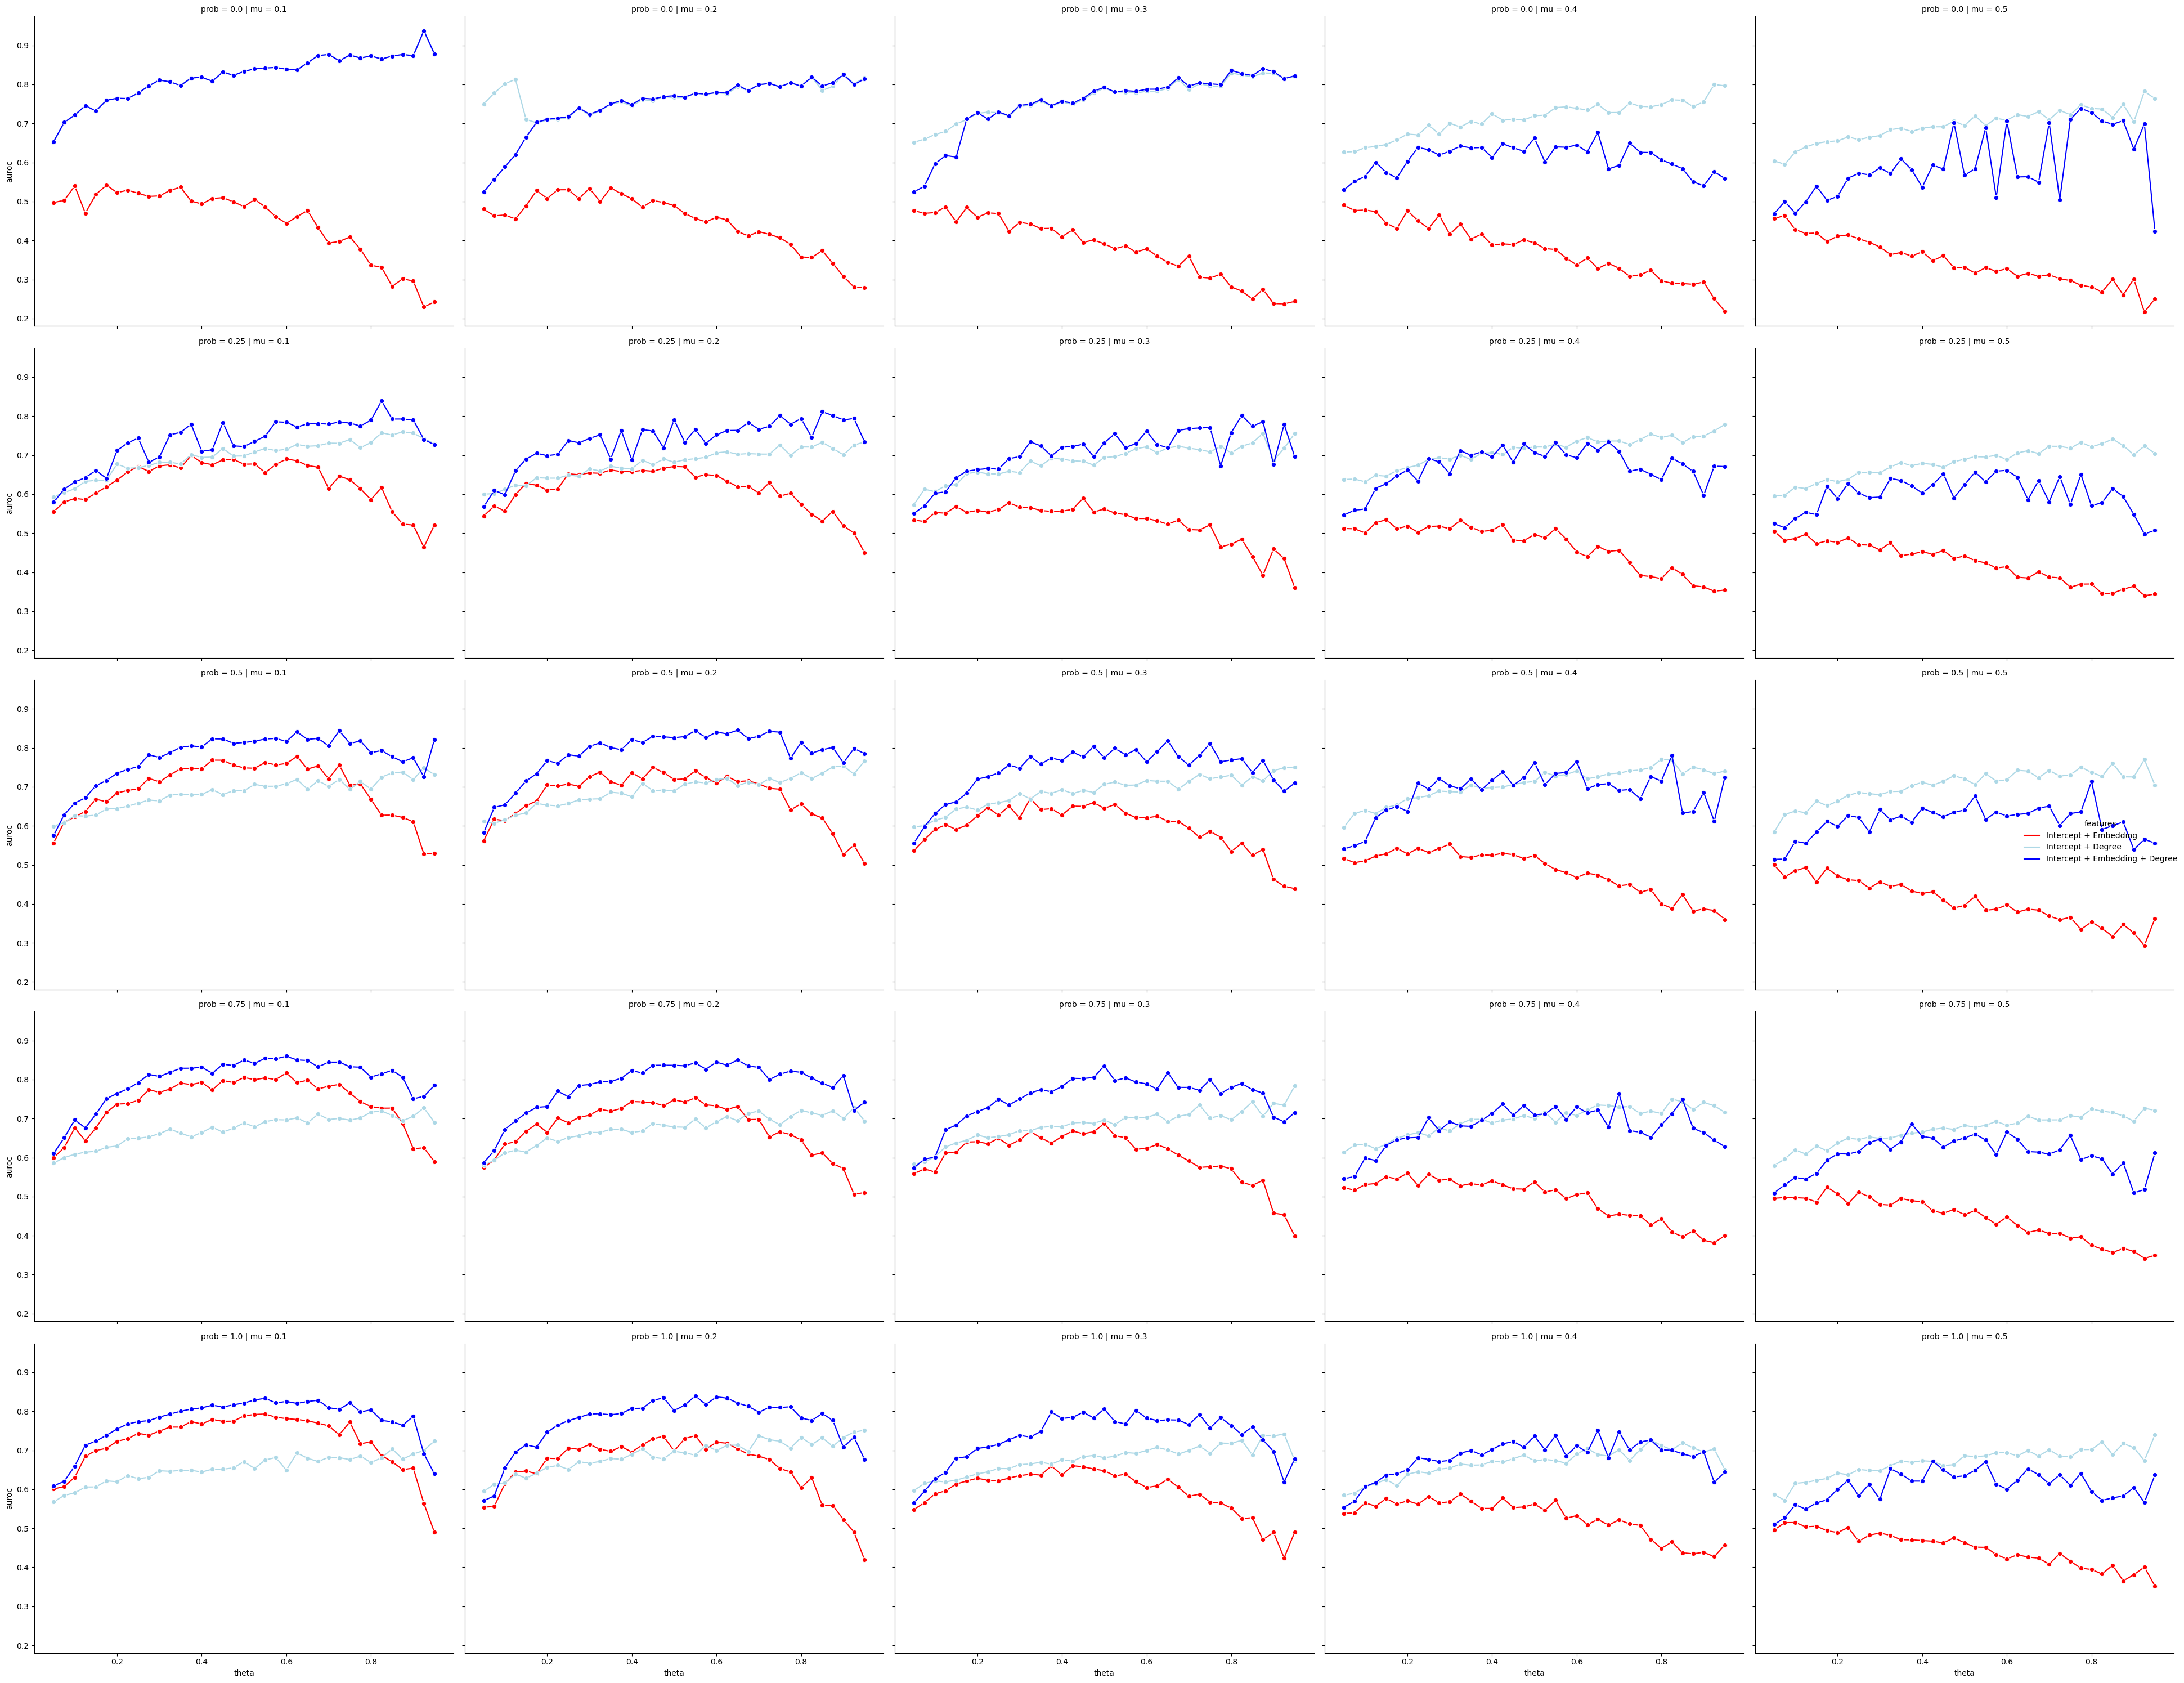

In [124]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", row="prob",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

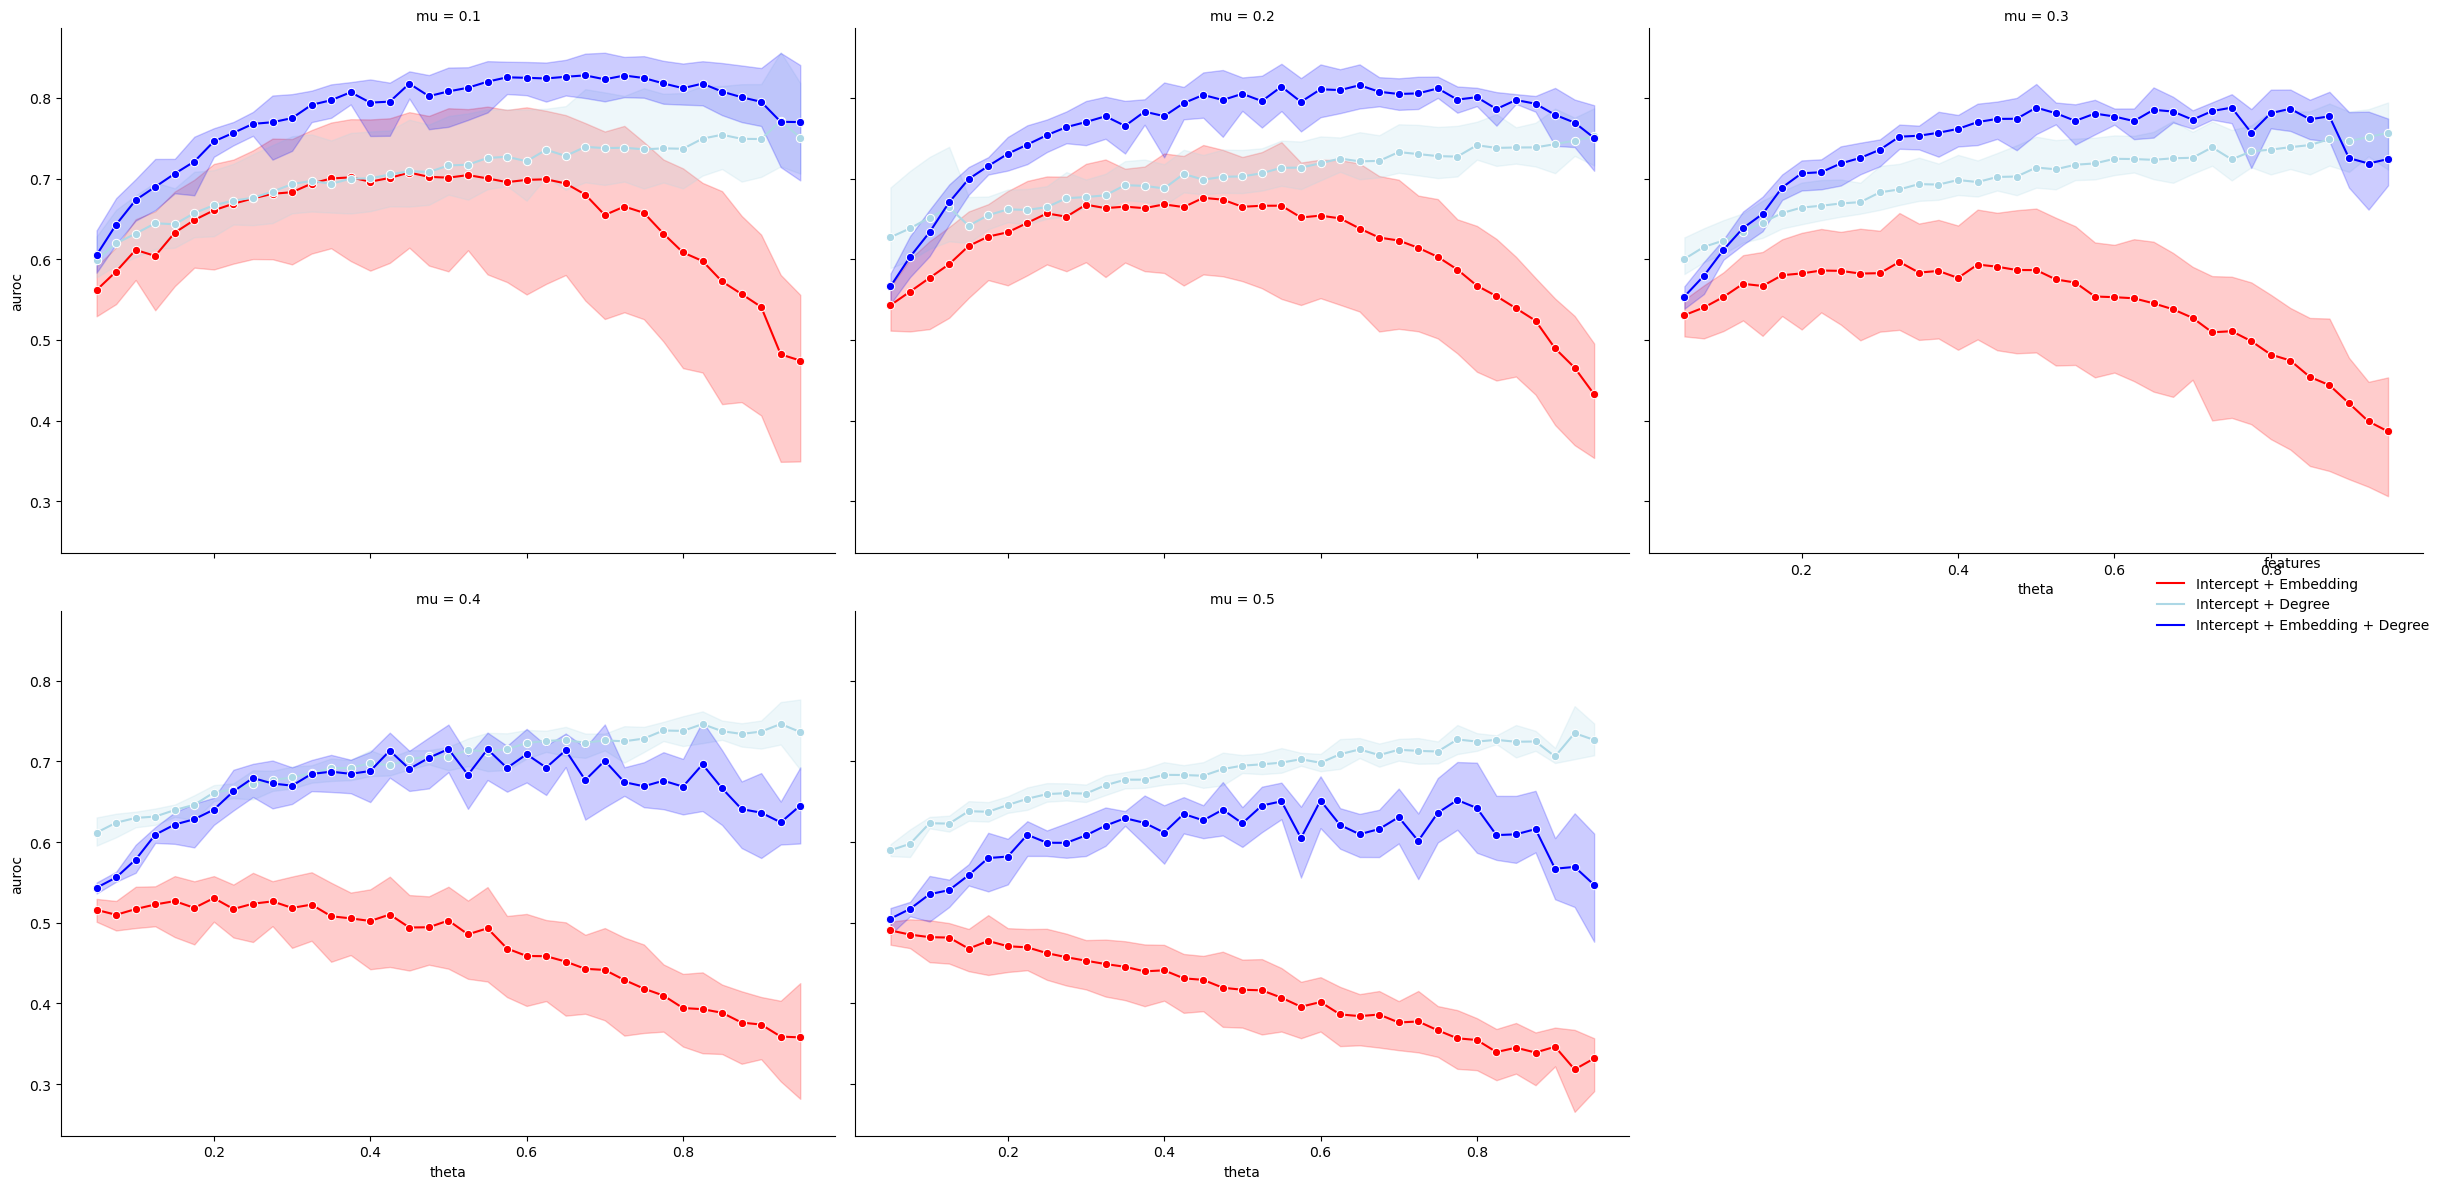

In [125]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", col_wrap=3,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_hue-features_col-mu_{TAG}.png",
    facecolor="white",
    transparent=False
)

<Figure size 640x480 with 0 Axes>

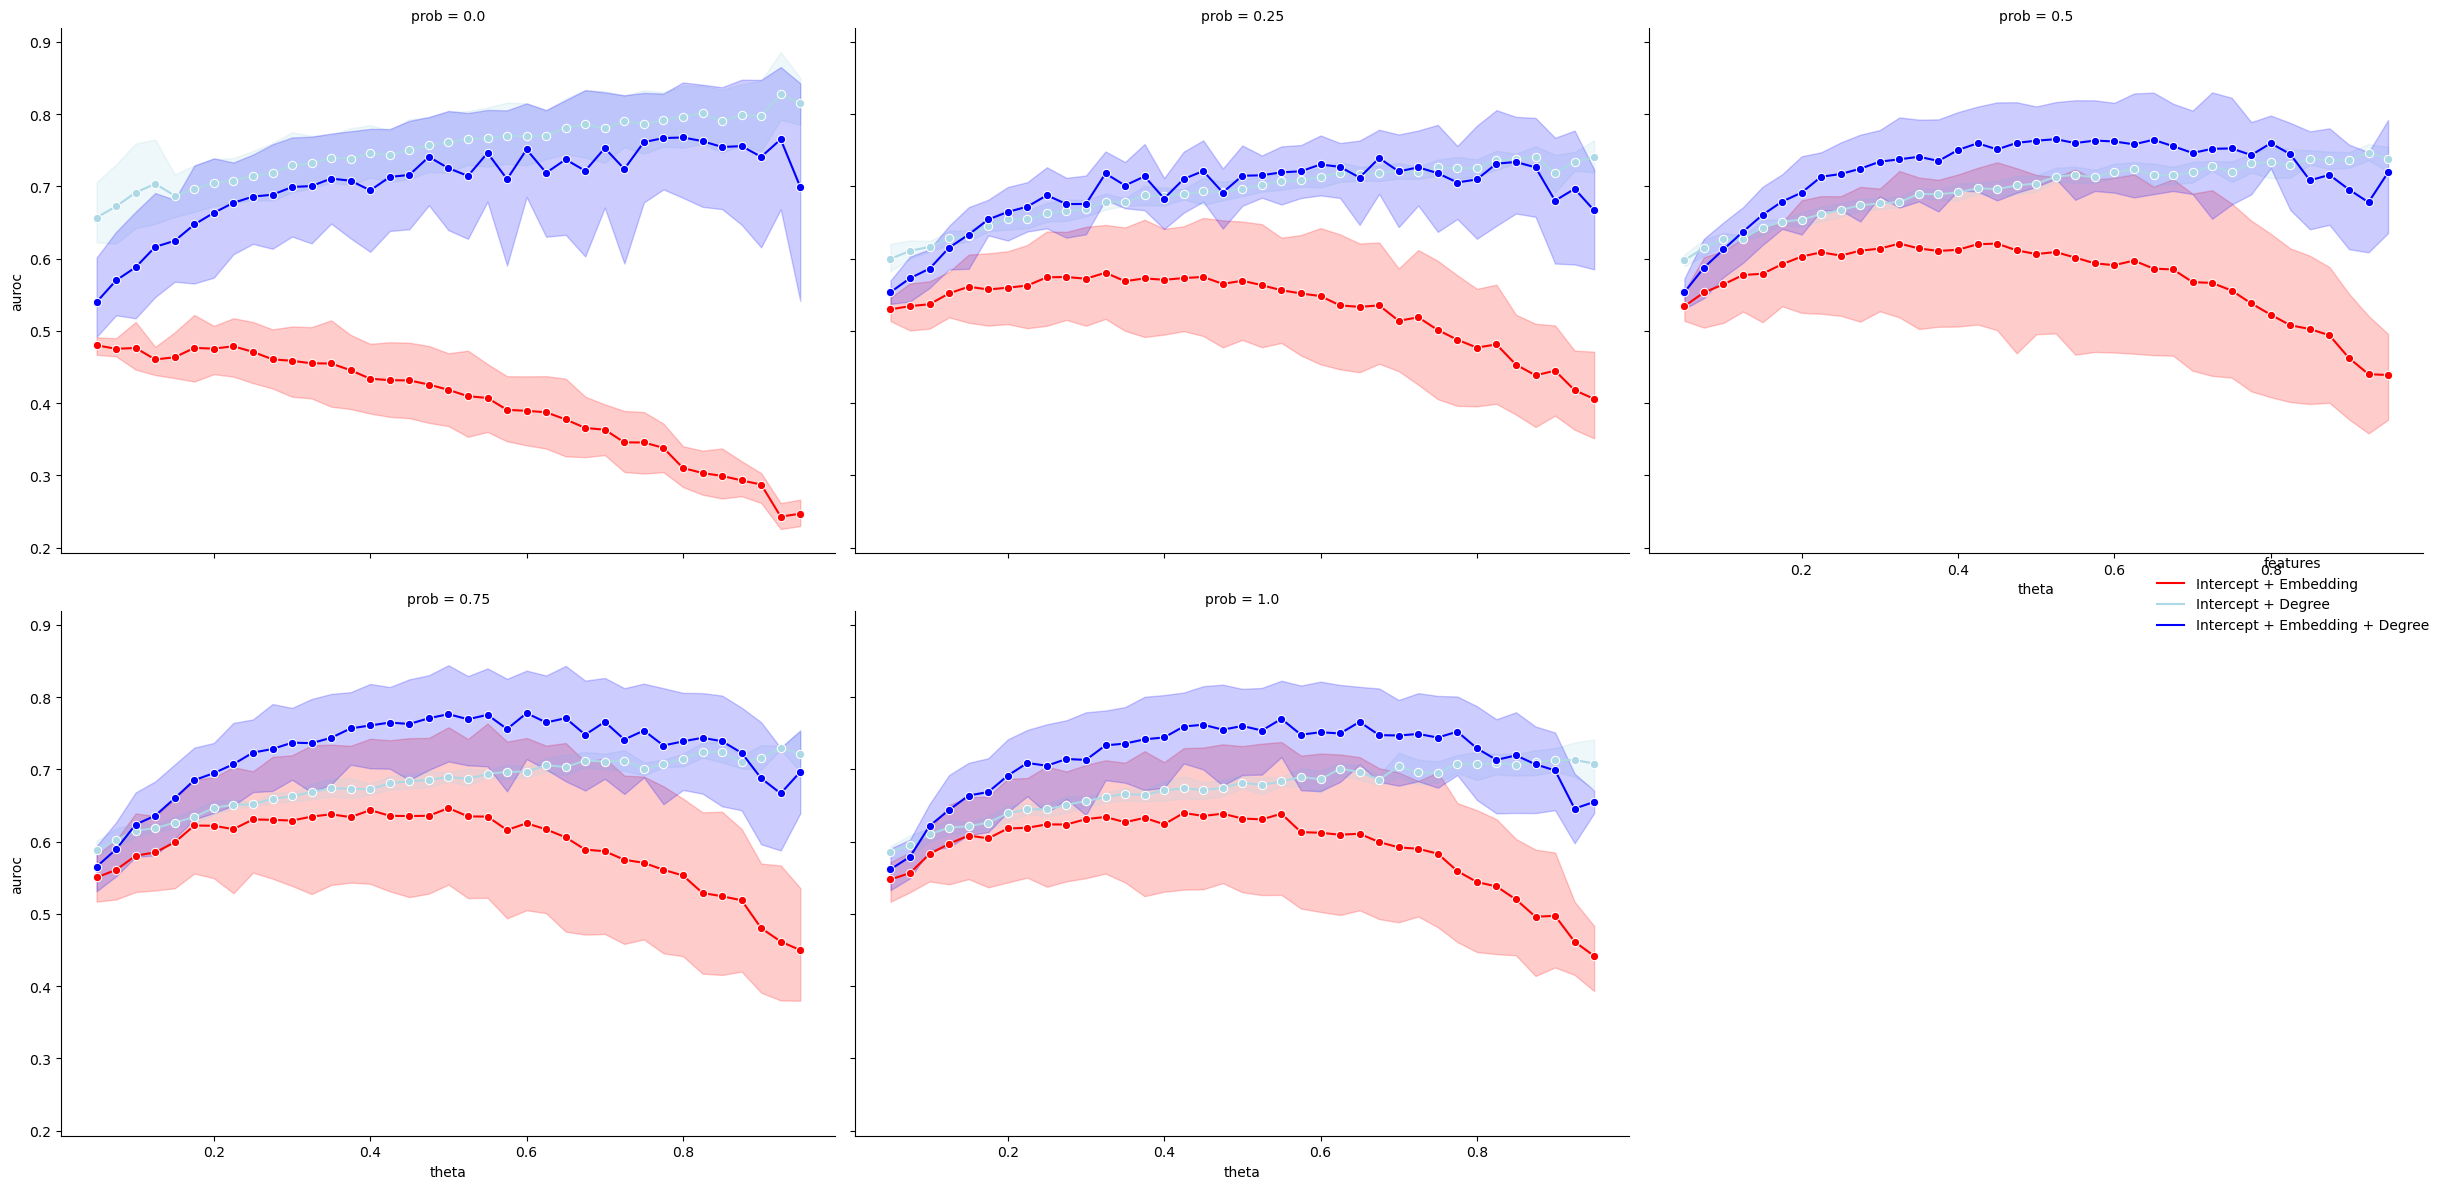

In [126]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="prob", col_wrap=3,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_hue-features_col-prob_{TAG}.png",
    facecolor="white",
    transparent=False
)

### Case Studies

#### Easy

<Figure size 640x480 with 0 Axes>

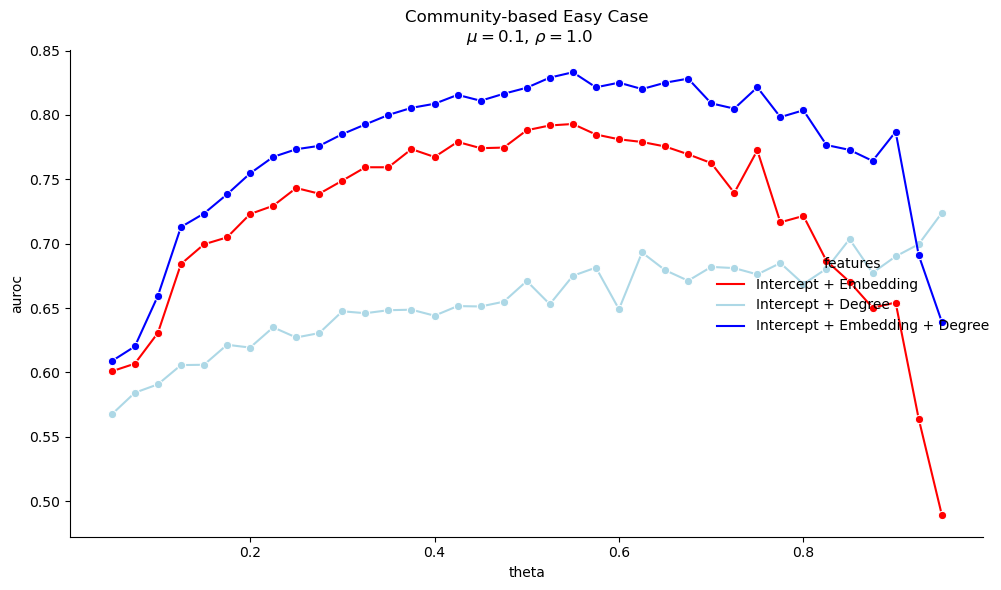

In [127]:
# Instantiate figure, subset relevant data
case_easy_prob = 1.0  # uncorrelated communities
case_easy_mu = 0.1  # strong communities
case_easy = df_.query("prob == @case_easy_prob & mu == @case_easy_mu")
plt.figure()

# Plotting data
sns.relplot(
    data=case_easy, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", row="prob",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes
plt.title(f"Community-based Easy Case\n $\\mu = ${case_easy_mu}, $\\rho = ${case_easy_prob}")

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_hue-features_mu-0.1_prob-1.0_{TAG}.png",
    facecolor="white",
    transparent=False
)

#### Hard

<Figure size 640x480 with 0 Axes>

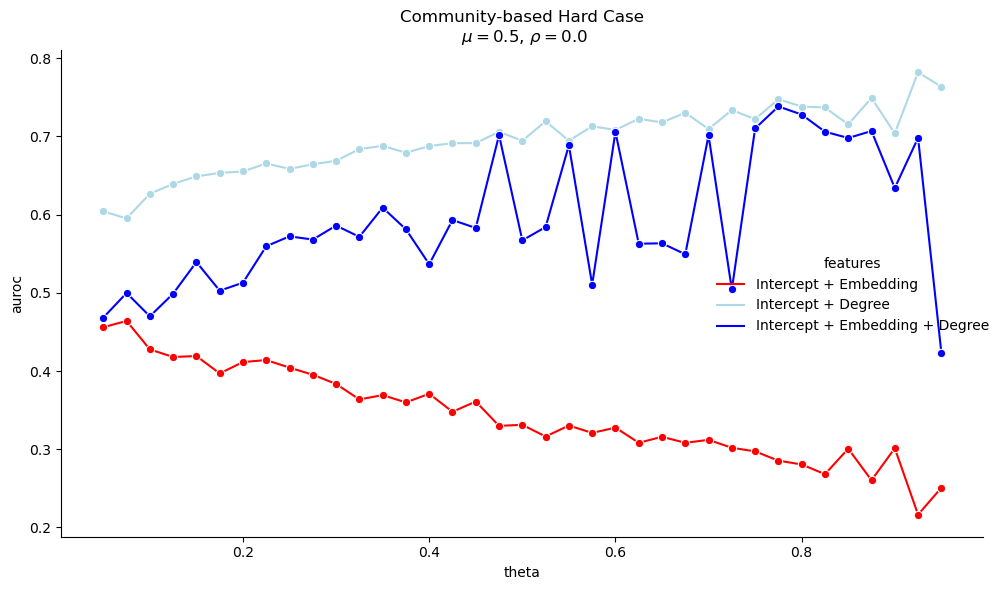

In [128]:
# Instantiate figure, subset relevant data
case_hard_prob = 0.0  # uncorrelated communities
case_hard_mu = 0.5  # strong communities
case_hard = df_.query("prob == @case_hard_prob & mu == @case_hard_mu")
plt.figure()

# Plotting data
sns.relplot(
    data=case_hard, kind="line",
    x="theta", y="auroc",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", row="prob",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes
plt.title(f"Community-based Hard Case\n $\\mu = ${case_hard_mu}, $\\rho = ${case_hard_prob}")

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_hue-features_mu-0.5_prob-0.0_{TAG}.png",
    facecolor="white",
    transparent=False
)

## Comparison with prior results

In [129]:
# Load prior results
with open("../../results/MEC/figure1c_data.pk", "rb") as _fh:
    df_f1c = pickle.load(_fh)
with open("../../results/MEC/figure1d_data.pk", "rb") as _fh:
    df_f1d = pickle.load(_fh)

# Reformat synthetic data
mus = []
probs = []
aurocs = []
methods = []

for mu, data_ in df_f1c.items():
    for idx, prob in enumerate(data_[0]):
        mus.append(mu)
        probs.append(prob)
        aurocs.append(data_[-1][idx])
        methods.append("D")

for mu, data_ in df_f1d.items():
    for idx, prob in enumerate(data_[0]):
        mus.append(mu)
        probs.append(prob)
        aurocs.append(data_[-1][idx])
        methods.append("DC")

df_f1 = pd.DataFrame({
    "mu": mus,
    "prob": probs,
    "AUROC": aurocs,
    "method": methods
})

In [130]:
# # Instantiate figure, subset relevant data
# case_easy_prob = 1.0  # uncorrelated communities
# case_easy_mu = 0.1  # strong communities
# case_easy = df_.query("prob == @case_easy_prob & mu == @case_easy_mu")
# case_easy_prior_D = df_f1.query("mu == @case_easy_mu & method == 'D'")
# case_easy_prior_DC = df_f1.query("mu == @case_easy_mu & method == 'DC'")
# plt.figure()

# # Plotting data
# ax = sns.relplot(
#     data=case_easy, kind="line",
#     x="theta", y="auroc",
#     hue="features", palette=["red", "lightblue", "blue"],
#     col="mu", row="prob",
#     marker="o",
#     height=6, aspect=1.2,
# )
# plt.plot(case_easy_prior_D.prob, case_easy_prior_D.AUROC, linestyle="--", color="gray", marker="^")
# plt.plot(case_easy_prior_DC.prob, case_easy_prior_DC.AUROC, linestyle="-.", color="gray", marker="v")

# # Axes configuration
# plt.xticks(sorted(set(case_easy.theta))[::6])

# # Figure-level attributes
# plt.title(f"DC-based \"Easy\" Case\n $\\mu = ${case_easy_mu}, $prob = ${case_easy_prob}")
# plt.annotate(
#     "D Classifier Prior Results",
#     xy=(0.05, 0.65), xytext=(0.02, 0.625),
#     rotation=75
# )
# plt.annotate(
#     "DC Classifier Prior Results",
#     xy=(0.05, 0.95), xytext=(0.05, 1.0),
#     rotation=0
# )
# sns.move_legend(ax, "center right", bbox_to_anchor=(1.25,0.6), ncol=1, frameon=True)

# # Save plot
# plt.tight_layout()

## Singular measures

<Figure size 640x480 with 0 Axes>

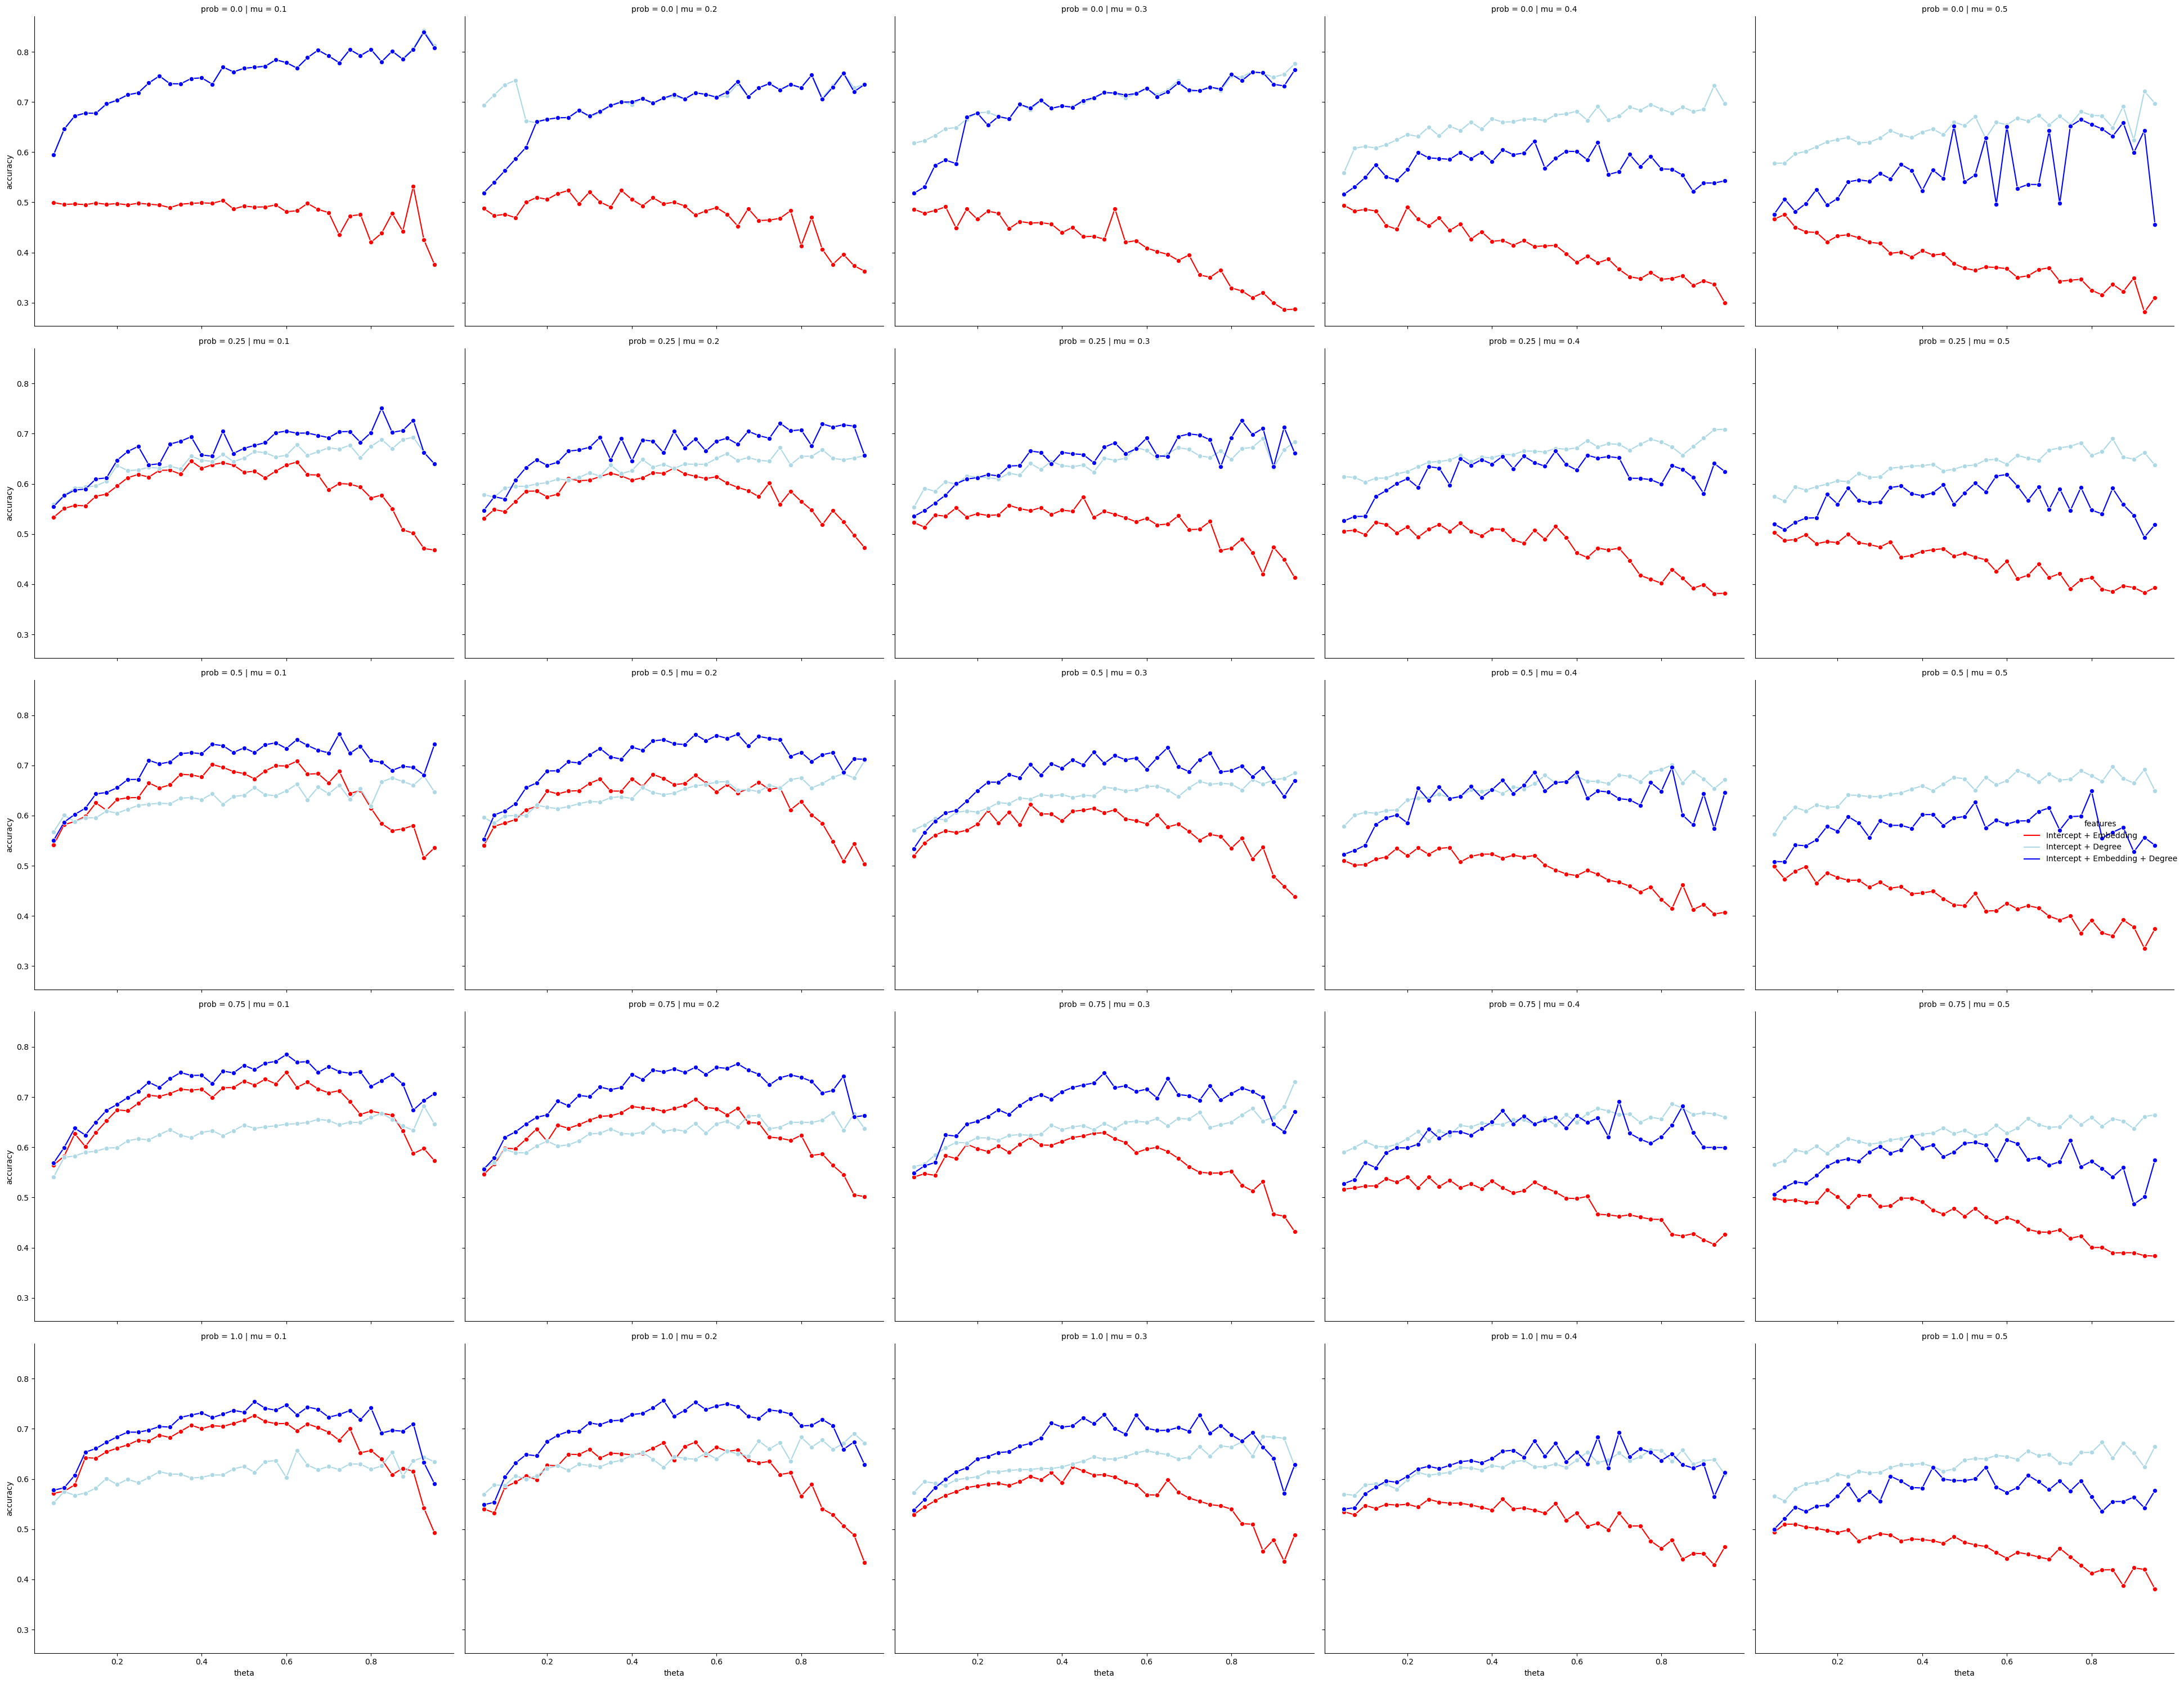

In [131]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="accuracy",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", row="prob",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes


# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

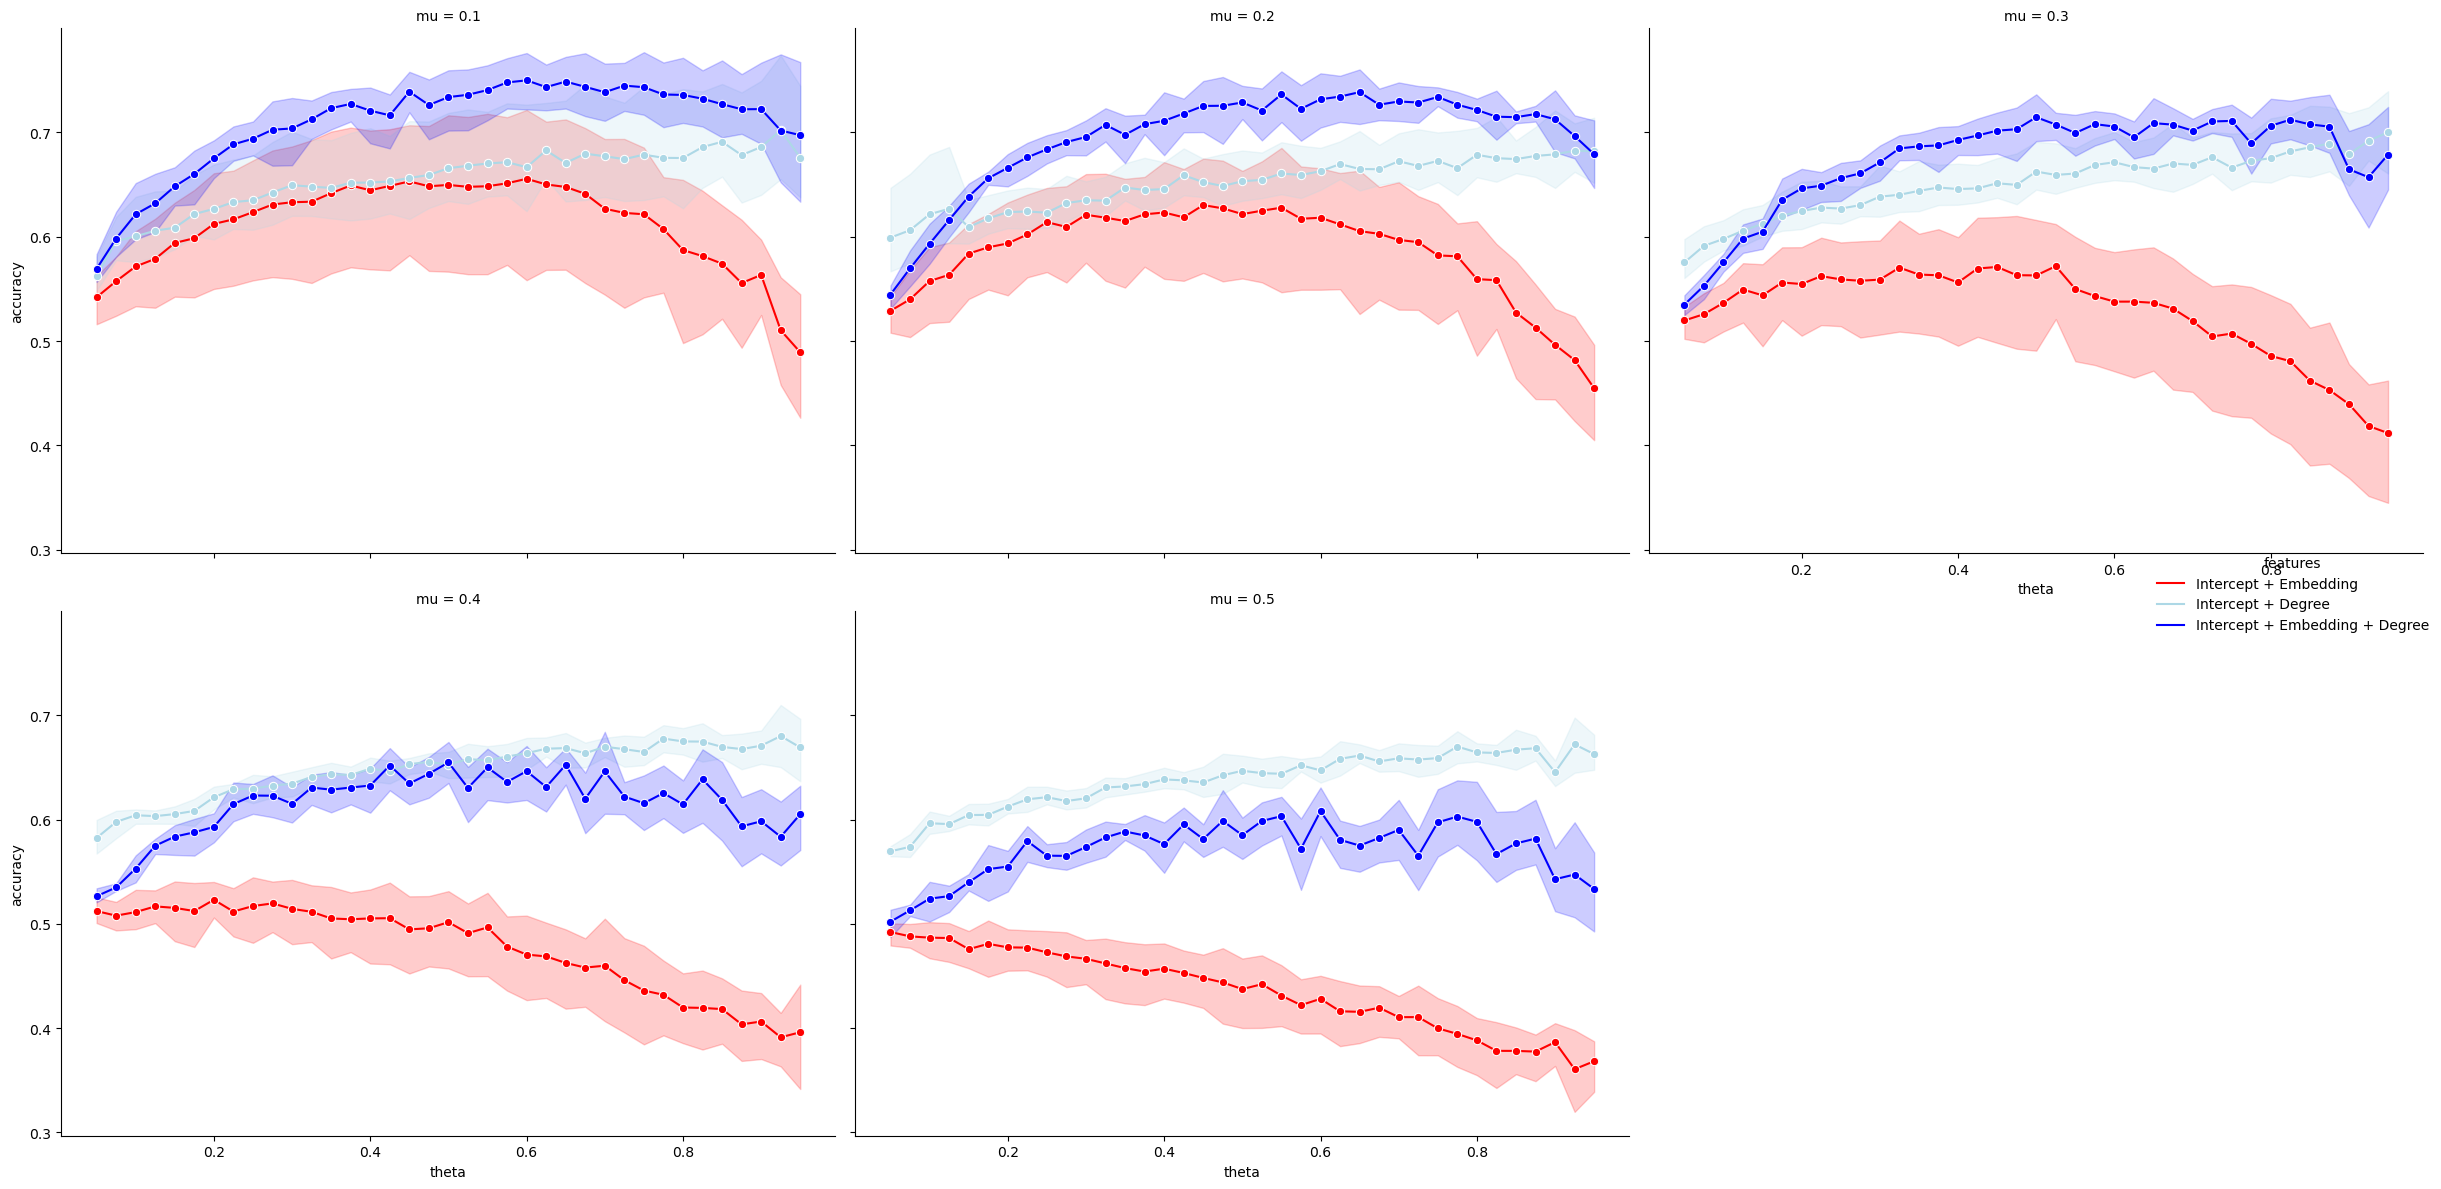

In [132]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="accuracy",
    hue="features", palette=["red", "lightblue", "blue"],
    col="mu", col_wrap=3,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

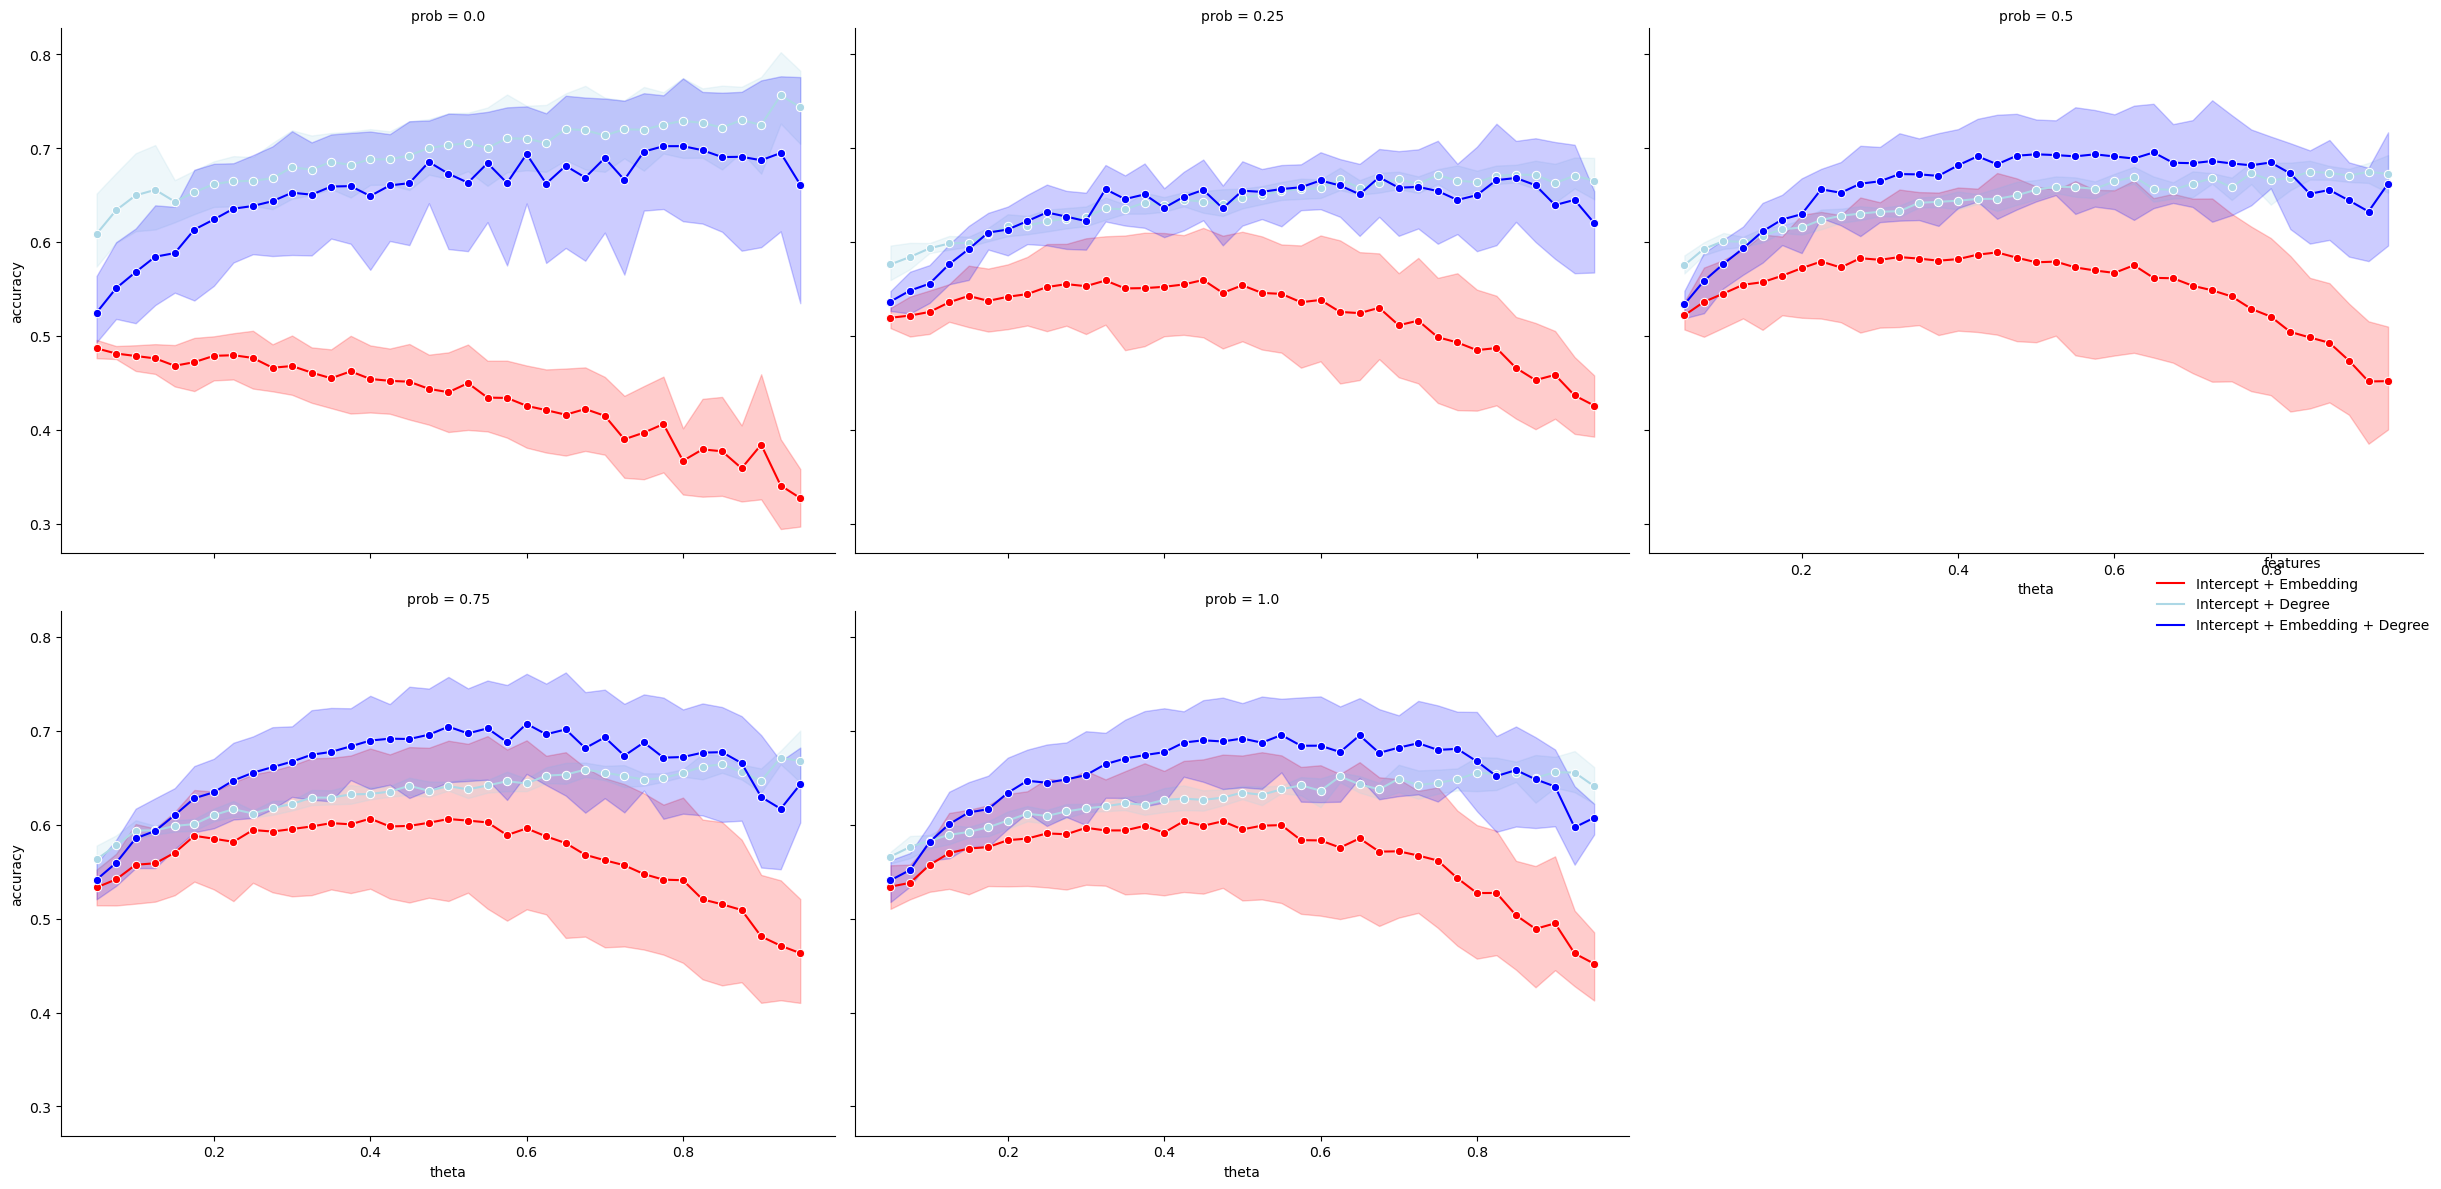

In [133]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="accuracy",
    hue="features", palette=["red", "lightblue", "blue"],
    col="prob", col_wrap=3,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

# Coefficient analysis

## Preprocessing

In [145]:
mu = 0.4
prob = 0.25
df_ = df.query("features in @_features")
df_ = df_.query("mu == @mu & prob == @prob")

df_melted = df_.melt(
    id_vars=["theta", "features"],
    value_vars=["intercept", "coef_emb", "coef_deg"],
)
df_melted["absvalue"] = df_melted["value"].apply(np.abs)

## Coefficient evolution

<Figure size 640x480 with 0 Axes>

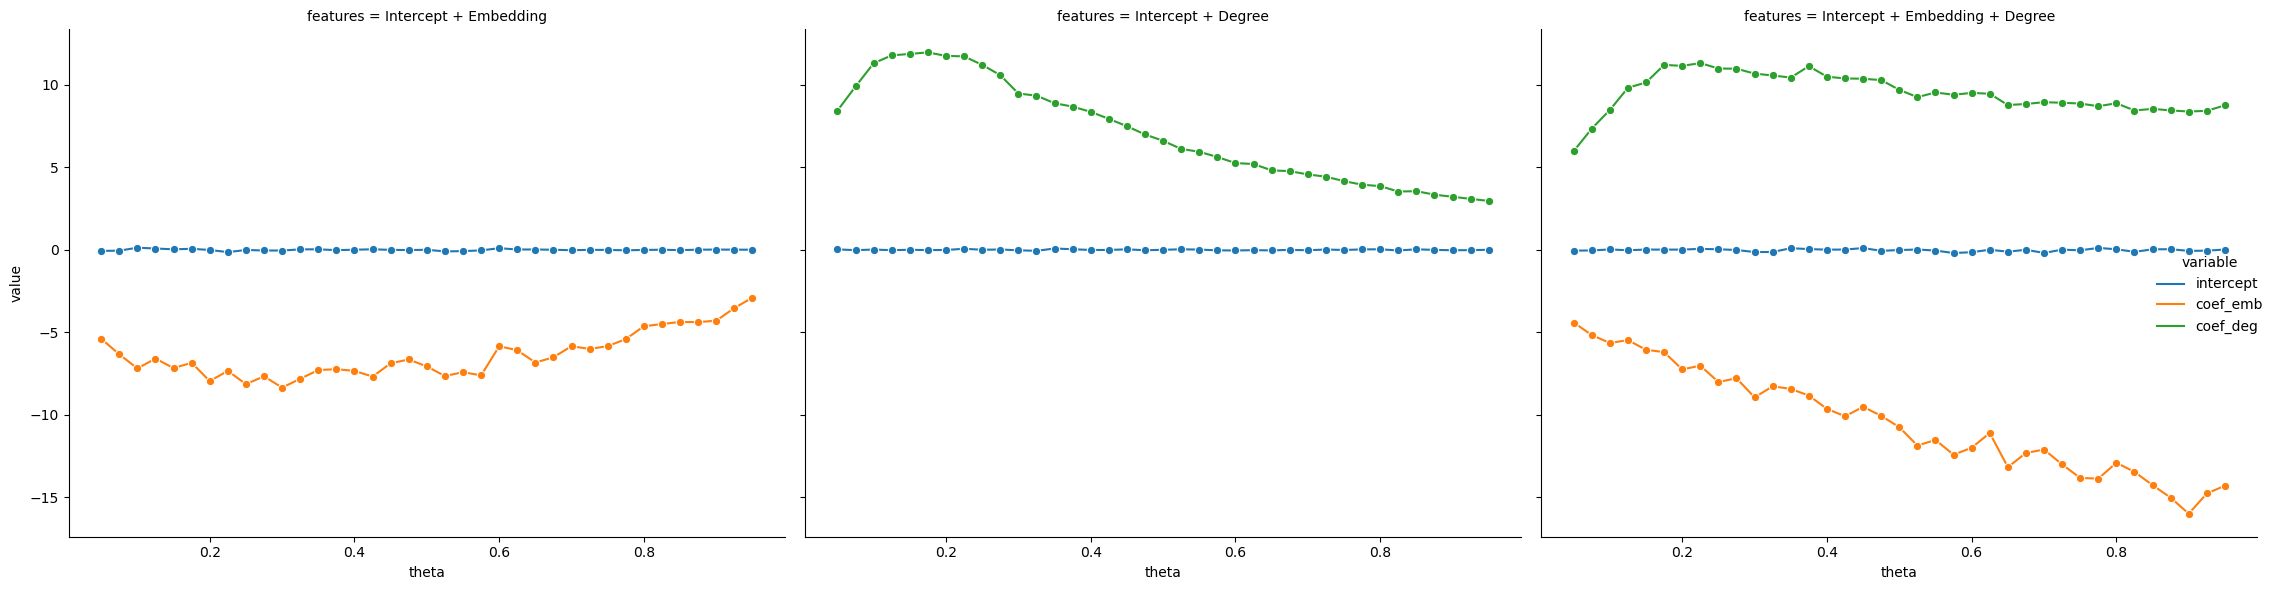

<Figure size 640x480 with 0 Axes>

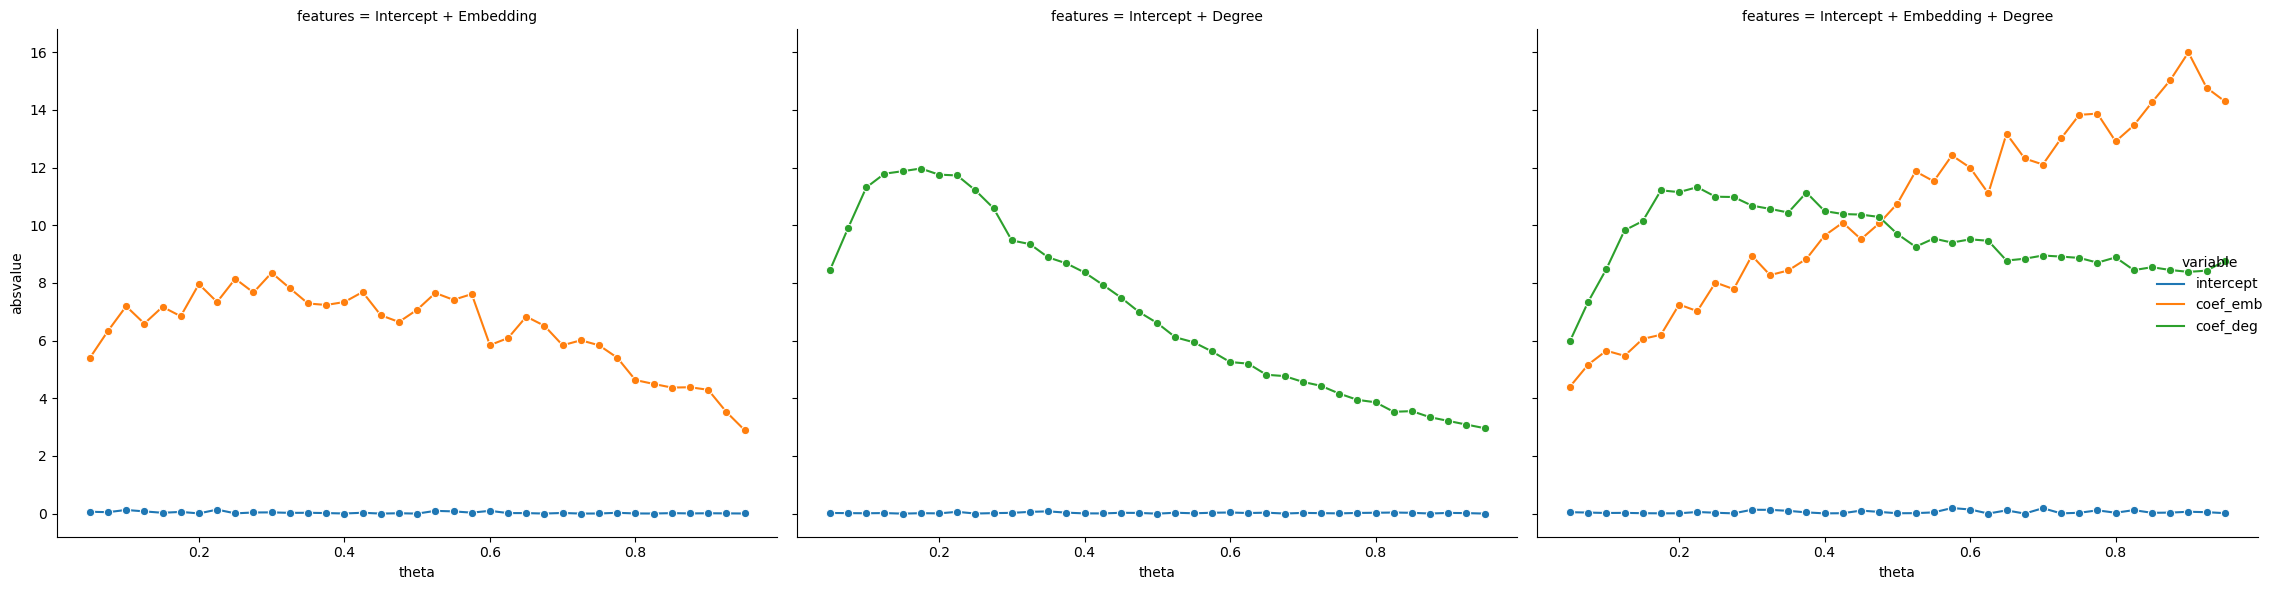

In [146]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_melted, kind="line",
    x="theta", y="value",
    hue="variable",
    col="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

# ==================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_melted, kind="line",
    x="theta", y="absvalue",
    hue="variable",
    col="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_abscoefs-theta_hue-feature_col-features_mu-0.4_prob-0.25_{TAG}.png",
    facecolor="white",
    transparent=False
)

# Decision boundaries

In [136]:
def logistic(emb=0, deg=0, intercept=0, coef_emb=0, coef_deg=0):
    a = intercept + coef_emb*emb + coef_deg*deg
    b = 1 / (1 + np.exp(-a))

    return b

In [137]:
mu = 0.1

Text(0.5, 1.0, '$\\mu=$0.1 Decision Boundary\nIntercept + Embedding features')

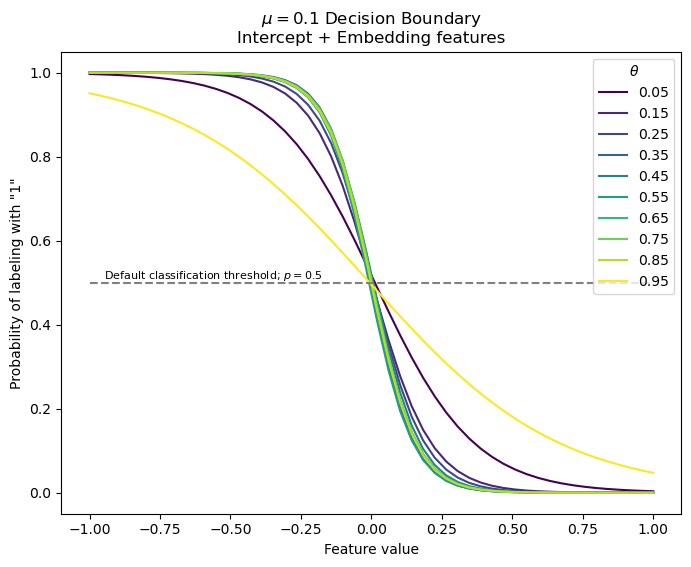

In [138]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding' & mu == @mu")

# Set up predictor
deg = coef_deg = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_emb = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=x, deg=deg, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/9))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold; $p=0.5$",
    xy=(-0.5, 0.5), xytext=(-0.95, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"$\\mu=${mu} Decision Boundary\nIntercept + Embedding features")

Text(0.5, 1.0, '$\\mu = $0.1 Decision Boundary\nIntercept + Degree features')

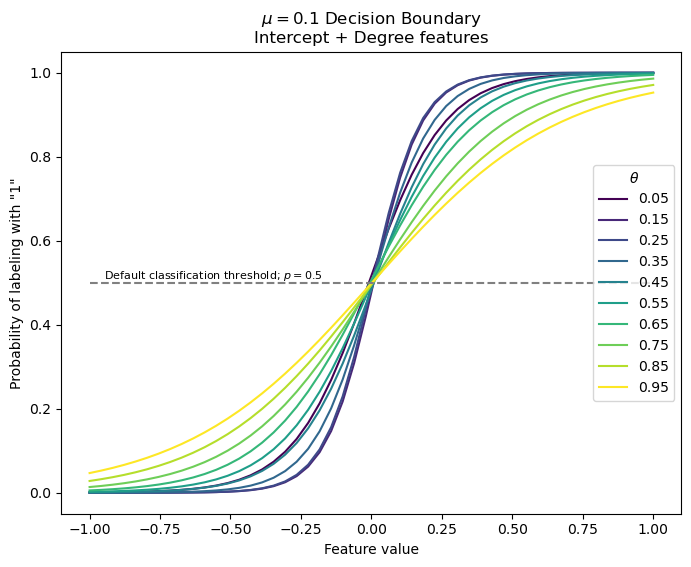

In [139]:
# Subset data
df_ = df.query("features == 'Intercept + Degree' & mu == @mu")

# Set up predictor
emb = coef_emb = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_deg = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=emb, deg=x, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/9))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$", loc="center right")

# Prettify figure
plt.annotate(
    "Default classification threshold; $p=0.5$",
    xy=(-0.5, 0.5), xytext=(-0.95, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"$\\mu = ${mu} Decision Boundary\nIntercept + Degree features")

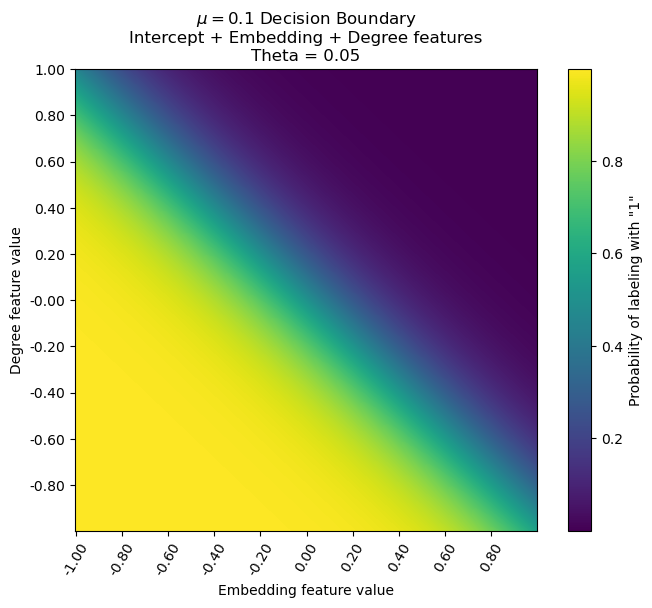

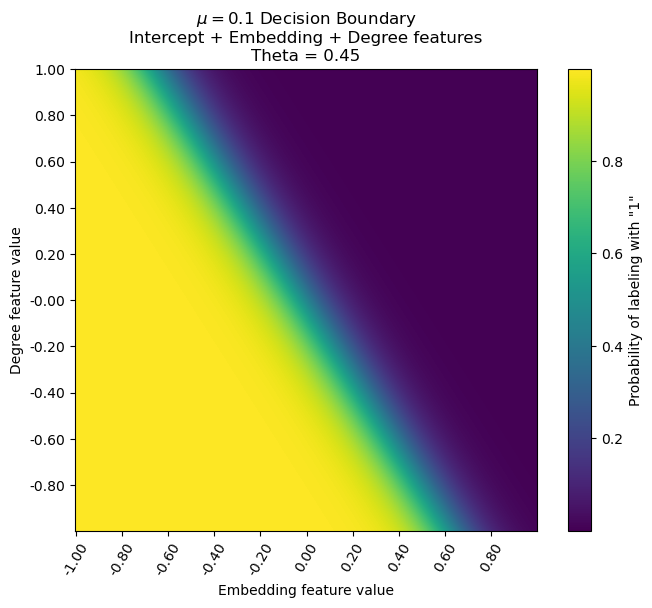

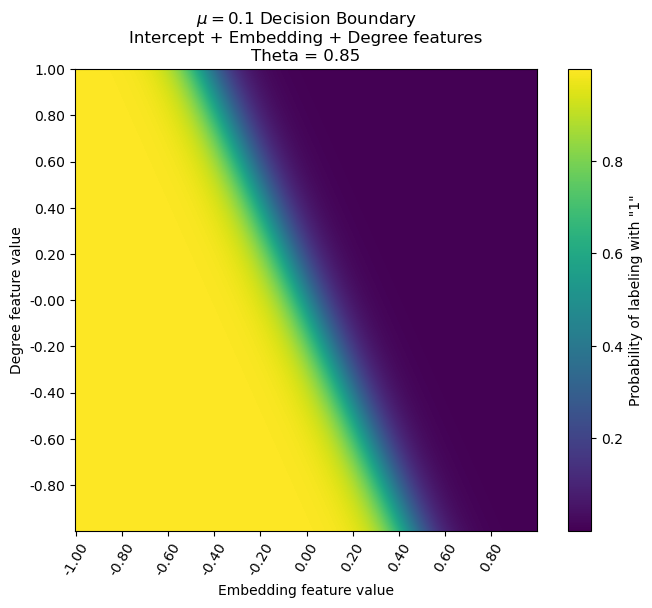

In [140]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding + Degree' & mu == @mu")

# Set up predictor
X = np.linspace(-1,1, num=500)

# Set up figure

# Calculate decision boundary
for df_group in list(df_.groupby("theta"))[::16]:
    plt.figure(figsize=(8,6))
    theta, df_group = df_group
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coef_emb = df_group.iloc[0].coef_emb
    coef_deg = df_group.iloc[0].coef_deg

    Z = np.array([
        logistic(emb=x, deg=y, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for y in X for x in X
    ]).reshape(len(X), len(X))

    # Plot logistic curve
    plt.imshow(Z)

    # Prettify figure
    plt.colorbar(label="Probability of labeling with \"1\"")

    plt.xticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::50]], rotation=60)
    plt.yticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::-50]])

    plt.xlabel("Embedding feature value")
    plt.ylabel("Degree feature value")
    plt.title(f"$\\mu = ${mu} Decision Boundary\nIntercept + Embedding + Degree features\nTheta = {theta:.2f}")